# **-----------------**>**FRAUD TRANSACTION DETECTION PROJECT**<**-----------------**

# 1. Load the Dataset

In [7]:
import pandas as pd

# Define the path to the dataset
data_path = r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - DATA SCIENCE\Fraud Transaction Detection Project\creditcard.csv"

# Load the dataset
data = pd.read_csv(data_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 2. Data Preprocessing

In [8]:
# Convert 'Class' column to integer if needed
data['Class'] = data['Class'].astype(int)

# Handle missing values if any
print(data.isnull().sum())

# Separate features and target variable
X = data.drop(['Class'], axis=1)
y = data['Class']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# 3. Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. Handle Class Imbalance with SMOTE

In [10]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled training data
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


# 5. Model Training with Random Forest and GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('classifier', model)
])

# Fit the model directly
pipeline.fit(X_train_res, y_train_res)

# Print a message indicating the model has been trained
print("Model training complete.")


Model training complete.


# 6. Model Evaluation

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = pipeline.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[56856     8]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Evaluate the model


# Precision Class 0: 100%
# Precision Class 1: 91.67%

# 7. Plot Feature Importances

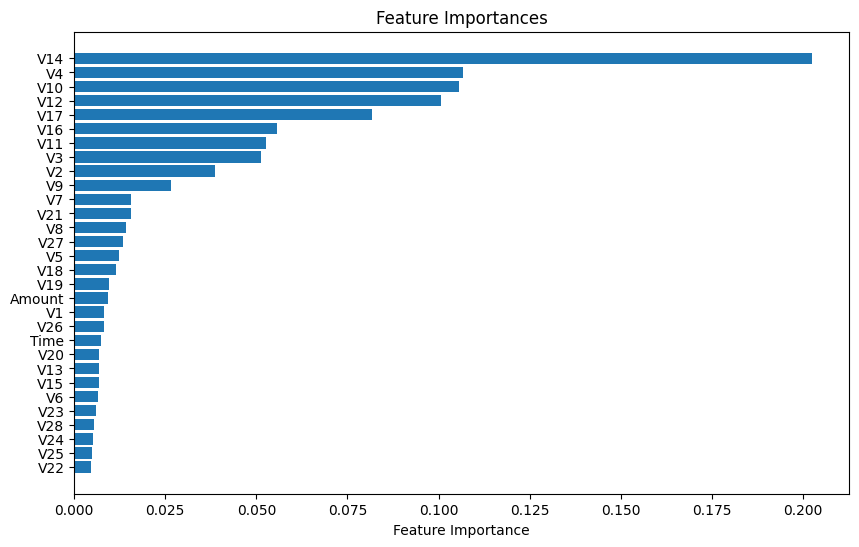

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
importances = pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Feature Importance')
plt.show()


1. Plot ROC Curve

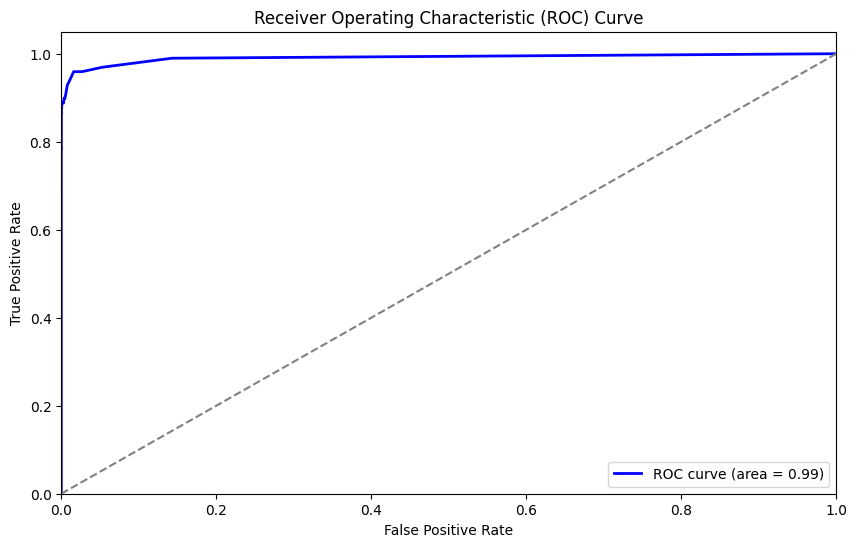

In [17]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


2. Plot Precision-Recall Curve

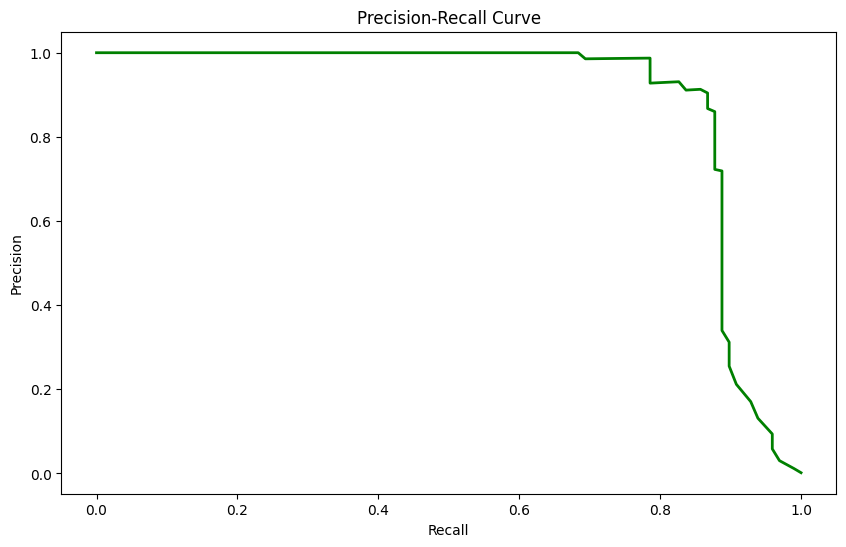

In [18]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, pipeline.predict_proba(X_test_scaled)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


3. Plot Confusion Matrix Heatmapmm

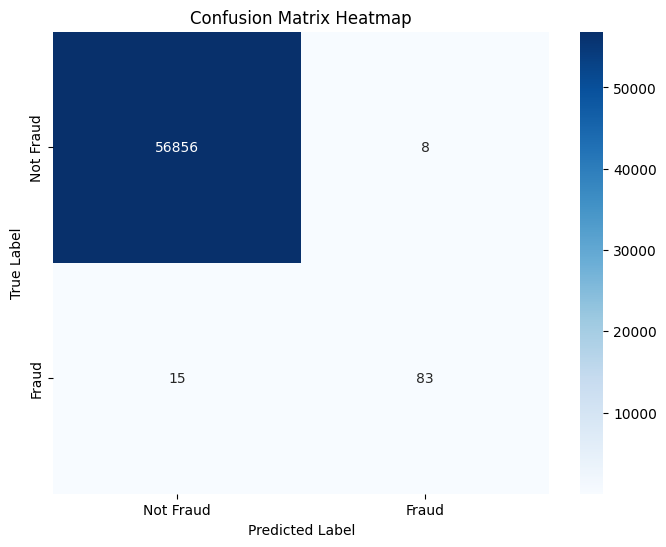

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = pipeline.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
